In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import json
import numpy as np
from numpy import mean
import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as ul
import time
import glob

### Upload PartD + LEIE

In [9]:
# load and combine the partD datasets across 2013-2019
tic = time.time()
path = r'/Users/alex/Desktop/Master/BA_Practicum_6217_10/Project/dataset/PartD' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

partD = pd.concat(li, axis=0, ignore_index=True)
toc = time.time()
print(toc - tic)

624.0627551078796


In [11]:
# Load LEIE dataset
leie = pd.read_csv("LEIE.csv")

/Users/alex/Desktop/Master/BA_Practicum_6217_10/Project/dataset


In [38]:
# Load REIN 2020 - 2021 dataset
path = r'/Users/alex/Desktop/Master/BA_Practicum_6217_10/Project/dataset/REIN' # use your path
all_REIN = glob.glob(path + "/*.csv")

li = []

for filename in all_REIN:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

rein_df = pd.concat(li, axis=0, ignore_index=True)

### Visualize PartD

In [14]:
partD.head(10)

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Isosorbide Mononitrate Er,Isosorbide Mononitrate,...,307,171.59,NaN,*,NaN,NaN,NaN,NaN,*,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Levofloxacin,Levofloxacin,...,165,227.10,26.0,NaN,15.0,15.0,159.72,106.0,NaN,15.0
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Lisinopril,Lisinopril,...,570,100.37,17.0,#,NaN,NaN,NaN,NaN,#,NaN
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Metoprolol Tartrate,Metoprolol Tartrate,...,916,154.65,28.0,#,NaN,NaN,NaN,NaN,#,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Prednisone,Prednisone,...,133,44.72,14.0,*,NaN,NaN,NaN,NaN,*,NaN
5,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Simvastatin,Simvastatin,...,487,102.06,16.0,#,NaN,NaN,NaN,NaN,#,NaN
6,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Warfarin Sodium,Warfarin Sodium,...,324,165.45,11.0,*,NaN,NaN,NaN,NaN,*,NaN
7,1003000142,Khalil,Rashid,Toledo,OH,39,Anesthesiology,S,Acetaminophen-Codeine,Acetaminophen With Codeine,...,563,242.98,11.0,#,NaN,NaN,NaN,NaN,*,NaN
8,1003000142,Khalil,Rashid,Toledo,OH,39,Anesthesiology,S,Baclofen,Baclofen,...,450,139.81,NaN,*,NaN,NaN,NaN,NaN,*,NaN
9,1003000142,Khalil,Rashid,Toledo,OH,39,Anesthesiology,S,Etodolac,Etodolac,...,600,442.07,NaN,NaN,0.0,0.0,0.00,0.0,#,NaN


In [15]:
partD.shape

(173178285, 22)

In [16]:
partD.describe()

,Prscrbr_NPI,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes
count,1.731783e+08,1.731783e+08,1.731783e+08,1.731783e+08,1.731783e+08,6.818534e+07,9.885030e+07,9.885030e+07,9.885030e+07,9.885030e+07,1.614174e+07
mean,1.499359e+09,5.112200e+01,7.813860e+01,2.189153e+03,4.449106e+03,2.900172e+01,4.847437e+01,7.696227e+01,3.753986e+03,2.186169e+03,3.153298e+01
std,2.877320e+08,9.630050e+01,1.461296e+02,4.115958e+03,2.981228e+04,5.476985e+01,1.016768e+02,1.557155e+02,2.446189e+04,4.297649e+03,9.755356e+01
min,1.003000e+09,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245564e+09,1.500000e+01,1.900000e+01,4.500000e+02,2.583000e+02,1.400000e+01,1.300000e+01,1.600000e+01,2.086800e+02,3.900000e+02,1.300000e+01
50%,1.497881e+09,2.400000e+01,3.500000e+01,9.400000e+02,6.805800e+02,2.000000e+01,2.100000e+01,3.270000e+01,6.077400e+02,9.000000e+02,1.900000e+01
75%,1.740622e+09,5.000000e+01,7.500000e+01,2.100000e+03,2.311080e+03,3.200000e+01,4.700000e+01,7.200000e+01,2.095890e+03,2.028000e+03,3.400000e+01
max,1.993000e+09,1.993870e+05,2.047677e+05,6.066460e+05,3.343712e+07,1.418610e+05,1.906370e+05,1.957407e+05,3.196401e+07,5.928350e+05,1.355460e+05


# Data Cleaning

In [17]:
list(partD.columns)

['Prscrbr_NPI',
 'Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Sprsn_Flag',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Bene_Sprsn_Flag',
 'GE65_Tot_Benes']

In [22]:
## Only include useful variables
partD = partD[['Prscrbr_NPI',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes']]

In [20]:
partD.dtypes

Prscrbr_NPI           int64
Prscrbr_Type         object
Prscrbr_Type_Src     object
Brnd_Name            object
Gnrc_Name            object
Tot_Clms              int64
Tot_30day_Fills     float64
Tot_Day_Suply         int64
Tot_Drug_Cst        float64
Tot_Benes           float64
dtype: object

### Missing value detection

In [21]:
partD.isnull().sum(axis=0)

Prscrbr_NPI                 0
Prscrbr_Type               14
Prscrbr_Type_Src            0
Brnd_Name                   0
Gnrc_Name                   0
Tot_Clms                    0
Tot_30day_Fills             0
Tot_Day_Suply               0
Tot_Drug_Cst                0
Tot_Benes           104992940
dtype: int64

*** We have 2 prscrbr_type and 104992940 Tot_Benes are null.

### Change Null Tot_Benes to 5

In [23]:
partD.head(5)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Isosorbide Mononitrate Er,Isosorbide Mononitrate,11,11.0,307,171.59,NaN
1,1003000126,Internal Medicine,S,Levofloxacin,Levofloxacin,26,26.0,165,227.10,26.0
2,1003000126,Internal Medicine,S,Lisinopril,Lisinopril,19,19.0,570,100.37,17.0
3,1003000126,Internal Medicine,S,Metoprolol Tartrate,Metoprolol Tartrate,30,31.0,916,154.65,28.0
4,1003000126,Internal Medicine,S,Prednisone,Prednisone,14,14.0,133,44.72,14.0


In [24]:
partD_x = partD.copy()

In [25]:
partD_x["Tot_Benes"].fillna(5, inplace = True)

In [26]:
partD_x.head(10)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Isosorbide Mononitrate Er,Isosorbide Mononitrate,11,11.0,307,171.59,5.0
1,1003000126,Internal Medicine,S,Levofloxacin,Levofloxacin,26,26.0,165,227.10,26.0
2,1003000126,Internal Medicine,S,Lisinopril,Lisinopril,19,19.0,570,100.37,17.0
3,1003000126,Internal Medicine,S,Metoprolol Tartrate,Metoprolol Tartrate,30,31.0,916,154.65,28.0
4,1003000126,Internal Medicine,S,Prednisone,Prednisone,14,14.0,133,44.72,14.0
5,1003000126,Internal Medicine,S,Simvastatin,Simvastatin,17,17.0,487,102.06,16.0
6,1003000126,Internal Medicine,S,Warfarin Sodium,Warfarin Sodium,11,13.6,324,165.45,11.0
7,1003000142,Anesthesiology,S,Acetaminophen-Codeine,Acetaminophen With Codeine,22,22.0,563,242.98,11.0
8,1003000142,Anesthesiology,S,Baclofen,Baclofen,15,15.0,450,139.81,5.0
9,1003000142,Anesthesiology,S,Etodolac,Etodolac,20,20.0,600,442.07,5.0


In [27]:
partD_x.isnull().sum(axis=0)

Prscrbr_NPI          0
Prscrbr_Type        14
Prscrbr_Type_Src     0
Brnd_Name            0
Gnrc_Name            0
Tot_Clms             0
Tot_30day_Fills      0
Tot_Day_Suply        0
Tot_Drug_Cst         0
Tot_Benes            0
dtype: int64

In [28]:
## Drop the rows including missing vlaues in "Prscrbr_Type" column
partD_x = partD_x.dropna(axis = 0, subset = ["Prscrbr_Type"])
partD_x.isnull().sum(axis=0)

Prscrbr_NPI         0
Prscrbr_Type        0
Prscrbr_Type_Src    0
Brnd_Name           0
Gnrc_Name           0
Tot_Clms            0
Tot_30day_Fills     0
Tot_Day_Suply       0
Tot_Drug_Cst        0
Tot_Benes           0
dtype: int64

In [17]:
partD_x.dtypes

Prscrbr_NPI           int64
Prscrbr_Type         object
Prscrbr_Type_Src     object
Brnd_Name            object
Gnrc_Name            object
Tot_Clms              int64
Tot_30day_Fills     float64
Tot_Day_Suply         int64
Tot_Drug_Cst        float64
Tot_Benes           float64
dtype: object

### Invalid NPI detection

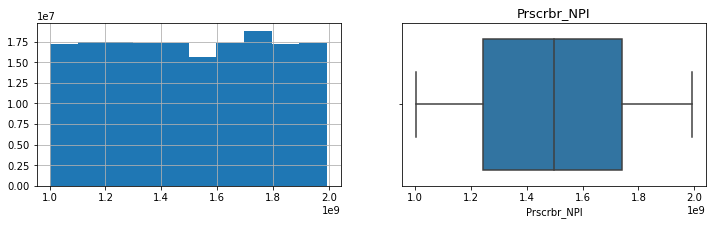

In [29]:
# Check the invalid NPI
# outliers can be invlid NPI 
plt.figure(figsize=(12,3))

plt.subplot(121)
partD_x["Prscrbr_NPI"].hist();

plt.subplot(122)
sns.boxplot('Prscrbr_NPI', data=partD_x)
plt.title('Prscrbr_NPI', fontsize=13);

# Data grouping

In [30]:
partD_x.head(5)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Isosorbide Mononitrate Er,Isosorbide Mononitrate,11,11.0,307,171.59,5.0
1,1003000126,Internal Medicine,S,Levofloxacin,Levofloxacin,26,26.0,165,227.10,26.0
2,1003000126,Internal Medicine,S,Lisinopril,Lisinopril,19,19.0,570,100.37,17.0
3,1003000126,Internal Medicine,S,Metoprolol Tartrate,Metoprolol Tartrate,30,31.0,916,154.65,28.0
4,1003000126,Internal Medicine,S,Prednisone,Prednisone,14,14.0,133,44.72,14.0


In [46]:
x_var = ["Prscrbr_NPI", "Prscrbr_Type", "Prscrbr_Type_Src", "Brnd_Name", "Gnrc_Name", "Tot_Clms", "Tot_30day_Fills", 
         "Tot_Day_Suply", "Tot_Drug_Cst", "Tot_Benes"]
group_by = ["Prscrbr_NPI", "Prscrbr_Type"]
cont_var = ["Tot_Clms", "Tot_30day_Fills", "Tot_Day_Suply", "Tot_Drug_Cst", "Tot_Benes"]
stat_col = ["mean", "sum", "median", "std", "min", "max"]

# group the dateset by the list "group_by" adding statistics ("stat_col") with the continuous variables in the list "cont_var"
partD_new = partD_x[x_var].groupby(group_by, as_index = False).agg({"Tot_Clms":stat_col,
                                                                  "Tot_30day_Fills":stat_col,
                                                                  "Tot_Day_Suply":stat_col,
                                                                  "Tot_Drug_Cst":stat_col,
                                                                  "Tot_Benes":stat_col})

In [47]:
partD_new.head(5)

Prscrbr_NPI        Prscrbr_Type   Tot_Clms                                   \
                                        mean   sum median        std min  max   
0  1003000126   Internal Medicine  21.775701  2330   17.0  12.359633  11   71   
1  1003000142      Anesthesiology  70.476562  9021   33.5  82.668484  11  358   
2  1003000167             Dentist  17.400000   261   14.0   5.985697  11   29   
3  1003000282  Nurse Practitioner  16.166667   194   14.0   5.797073  12   32   
4  1003000407     Family Practice  32.826840  7583   24.0  30.273756  11  241   

  Tot_30day_Fills          ... Tot_Drug_Cst                                \
             mean     sum  ...       median          std    min       max   
0       23.123364  2474.2  ...      158.830  2087.219339  29.97  12110.20   
1       73.642969  9426.3  ...     1311.125  9583.497937  31.88  53769.79   
2       17.540000   263.1  ...       71.330    19.890032  40.79    109.59   
3       20.333333   244.0  ...      223.105   500.681767  54.40   1882.55   
4       32.999567  7622.9  ...      288.440  2241.626264  42.56  15281.17   

   Tot_Benes                                        
        mean     sum median        std  min    max  
0  15.093458  1615.0   13.0  10.481370  5.0   57.0  
1  20.406250  2612.0   13.0  21.925585  5.0  110.0  
2  12.066667   181.0   12.0   7.146095  5.0   26.0  
3   5.583333    67.0    5.0   2.020726  5.0   12.0  
4   8.896104  2055.0    5.0   7.784462  5.0   53.0  

[5 rows x 32 columns]

In [48]:
# There are null values in every standard deviation variable
# the null values are produced because the procedures were performed only once within the given year (2019)
partD_new.isnull().sum(axis=0)

Prscrbr_NPI                     0
Prscrbr_Type                    0
Tot_Clms         mean           0
                 sum            0
                 median         0
                 std       131024
                 min            0
                 max            0
Tot_30day_Fills  mean           0
                 sum            0
                 median         0
                 std       131024
                 min            0
                 max            0
Tot_Day_Suply    mean           0
                 sum            0
                 median         0
                 std       131024
                 min            0
                 max            0
Tot_Drug_Cst     mean           0
                 sum            0
                 median         0
                 std       131024
                 min            0
                 max            0
Tot_Benes        mean           0
                 sum            0
                 median         0
              

In [49]:
# Replace the null values with 0
partD_new = partD_new.fillna(0)
partD_new.isnull().sum(axis=0)

Prscrbr_NPI                0
Prscrbr_Type               0
Tot_Clms         mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_30day_Fills  mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Day_Suply    mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Drug_Cst     mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Benes        mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
dtype: int64

In [50]:
# Rename the columns 
partD_new.columns = ["".join(x) for x in partD_new.columns.ravel()]

In [51]:
partD_new.columns

Index(['Prscrbr_NPI', 'Prscrbr_Type', 'Tot_Clmsmean', 'Tot_Clmssum',
       'Tot_Clmsmedian', 'Tot_Clmsstd', 'Tot_Clmsmin', 'Tot_Clmsmax',
       'Tot_30day_Fillsmean', 'Tot_30day_Fillssum', 'Tot_30day_Fillsmedian',
       'Tot_30day_Fillsstd', 'Tot_30day_Fillsmin', 'Tot_30day_Fillsmax',
       'Tot_Day_Suplymean', 'Tot_Day_Suplysum', 'Tot_Day_Suplymedian',
       'Tot_Day_Suplystd', 'Tot_Day_Suplymin', 'Tot_Day_Suplymax',
       'Tot_Drug_Cstmean', 'Tot_Drug_Cstsum', 'Tot_Drug_Cstmedian',
       'Tot_Drug_Cststd', 'Tot_Drug_Cstmin', 'Tot_Drug_Cstmax',
       'Tot_Benesmean', 'Tot_Benessum', 'Tot_Benesmedian', 'Tot_Benesstd',
       'Tot_Benesmin', 'Tot_Benesmax'],
      dtype='object')

# Labeling

In [52]:
leie.head(10)

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,2020-03-19,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,1988-08-30,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,1997-06-20,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,2018-04-19,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,2009-03-19,0,0,NaN
5,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,1994-05-24,0,0,NaN
6,NaN,NaN,,1ST REHABILITATION OF PORT ST,MANAGEMENT SVCS CO,NaN,NaN,0,NaN,C/O 3659 MAGUIRE BLVD,ORLANDO,FL,32803,1128b8,2002-09-19,0,0,NaN
7,NaN,NaN,,2001 BATH AVENUE PHARMACY INC,OTHER BUSINESS,PHARMACY,NaN,0,NaN,2001 BATH AVENUE,BROOKLYN,NY,11214,1128a1,2011-08-18,0,0,NaN
8,NaN,NaN,,"2258 PHARMACY, INC",PHARMACY,NaN,NaN,0,NaN,2258 THIRD AVE,NEW YORK,NY,10035,1128b8,2003-07-20,0,0,NaN
9,NaN,NaN,,"227 NINTH AVENUE PHARMACY, INC",PHARMACY,NaN,NaN,0,NaN,227 9TH AVE,NEW YORK,NY,10011,1128b5,1997-09-03,0,0,NaN


In [53]:
# Convert the integer type of EXCLDATE to date format
leie['EXCLDATE'] = pd.to_datetime(leie['EXCLDATE'], format = '%Y%m%d')
rein_df['EXCLDATE'] = pd.to_datetime(rein_df['EXCLDATE'], format = '%Y%m%d')

In [54]:
# Check the Exclusion types (OIG Acts)
leie["EXCLTYPE"].value_counts()

1128b4      30940
1128a1      22200
1128a2       7141
1128a3       4549
1128a4       2978
1128b14      2257
1128b8       1493
1128b1        835
1128b5        810
1128b7        658
1128b3        309
1128Aa        150
1128b6         67
1128b2         56
1156           56
1128b15        34
BRCH SA        14
BRCH CIA       13
1128b11        11
1160            9
1128b16         3
1128b12         1
Name: EXCLTYPE, dtype: int64

In [55]:
# Make a list with the OIG rules that correspond to fradulent behaviors
label_list = ["1128a1", "1128a2", "1128a3", "1128a4", "1128b1", "1128b6", "1128b7"]

# Filter the column "NPI" and the rows matching to valid NPI, fraud-related exclusion types, and exclusion date before 2020
end_date = "2019-12-31"
leie_new = leie["NPI"][(leie["EXCLTYPE"].isin(label_list)) & (leie["NPI"] != 0 ) & (leie["EXCLDATE"] <= end_date)]
rein_new = rein_df["NPI"][(rein_df["EXCLTYPE"].isin(label_list)) & (rein_df["NPI"] != 0 ) & (rein_df["EXCLDATE"] <= end_date)]

In [56]:
# Label each row with fraud = 1/ non-fraud = 0
fraud_npi_list = leie_new.tolist()
fraud_npi_list.extend(rein_new.tolist())
partD_new['Fraud'] = np.where(partD_new['Prscrbr_NPI'].isin(fraud_npi_list), 1, 0)

In [57]:
# Ratio of the two classes
partD_new["Fraud"].value_counts()

0    1533075
1       1013
Name: Fraud, dtype: int64

In [58]:
# Export the cleaned dataset to a csv file

partD_new.to_csv("/Users/alex/Desktop/Master/BA_Practicum_6217_10/Project/dataset/partD_new.csv", index=False, header = True)

In [60]:
partD_new.shape

(1534088, 33)